In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform #pip install scikit-image
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
#import torch.utils.data as Data

print(torch.__version__)


1.4.0


In [2]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        #set(self.landmarks_frame.iloc[idx, 0])
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [3]:
face_dataset = FaceLandmarksDataset(csv_file='problem2-CNN/train.csv',
                                    root_dir='problem2-CNN/images/')

In [8]:
fig = plt.figure()
for i in range(len(face_dataset)):
    sample = face_dataset[i]
    print(i, sample['image'].shape, sample['landmarks'].shape)
    if i == 3:
        break
print(type(face_dataset[0]))

0 (575, 862, 3) (7,)
1 (575, 862, 3) (7,)
2 (575, 862, 3) (7,)
3 (575, 862, 3) (7,)
<class 'dict'>


<Figure size 432x288 with 0 Axes>

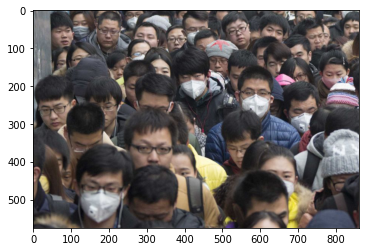

In [10]:
# len(set(face_dataset.landmarks_frame.iloc[:, 0]))
#face_dataset.landmarks_frame.iloc[0, 1:]
plt.imshow(face_dataset[0]['image'])